In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# **Introduction to Mean Reversion**

Mean reversion is a foundational concept in finance, asserting that asset prices and various economic indicators tend to move towards their historical average or mean over time. Mathematically, a mean-reverting time series $X_t$ can often be modeled using the Ornstein-Uhlenbeck stochastic differential equation:

$$ dX_t = \theta (\mu - X_t) dt + \sigma dW_t $$

Where $X_t$ represents the price of the asset at time $t$, $\theta$ is the speed of mean reversion, $\mu$ is the long-term mean level, $\sigma$ is the volatility, and $dW_t$ is a Wiener process or Brownian motion.

### **Significance in Financial Markets and Trading**

Mean reversion is pivotal for risk management, especially in portfolio management and option pricing. It forms the basis of various trading strategies, such as pairs trading and statistical arbitrage, where traders capitalize on the price deviations from its expected value. Understanding mean reversion can also aid in making informed decisions regarding asset allocation in a portfolio, ensuring diversification and risk mitigation. Furthermore, it plays a crucial role in discussions regarding market efficiency, as perfectly efficient markets would not exhibit mean-reverting behavior.

## **Applications in Various Fields**

In equity markets, traders often identify and trade stocks based on their mean-reverting tendencies. Commodity prices, such as oil or gold, are analyzed and predicted based on their potential to exhibit mean-reverting characteristics. The modeling of interest rates often employs mean-reverting stochastic processes, like the Vasicek or Cox-Ingersoll-Ross (CIR) models. In forex trading, traders capitalize on deviations of currency values from their historical means. Economic indicators, such as inflation rates or GDP, might revert to a long-term trend and are thus analyzed with mean reversion in mind. In energy markets, prices (e.g., electricity or natural gas prices) often exhibit mean-reverting behavior due to supply and demand dynamics. Evaluating property prices in real estate also involves observing their tendency to revert to long-term trends, aiding in investment decision-making.



## **2. Simple Example of Mean-Reverting Processes**

### **Ornstein-Uhlenbeck Process**

The **Ornstein-Uhlenbeck (OU) Process** is a stochastic process that is widely used to model mean-reverting behavior in financial markets. Mathematically, it is described by the following stochastic differential equation (SDE):

$$ dX_t = \theta (\mu - X_t) dt + \sigma dW_t $$

Here:
- $X_t$ is the process value at time $t$
- $\theta$ is the speed of mean reversion
- $\mu$ is the long-term mean of the process
- $\sigma$ is the volatility
- $dW_t$ is a standard Wiener process

The OU process is mean-reverting because the drift term $\theta (\mu - X_t)$ pushes the process back towards the mean $\mu$ whenever it deviates from it. Let's simulate an OU process using Python:




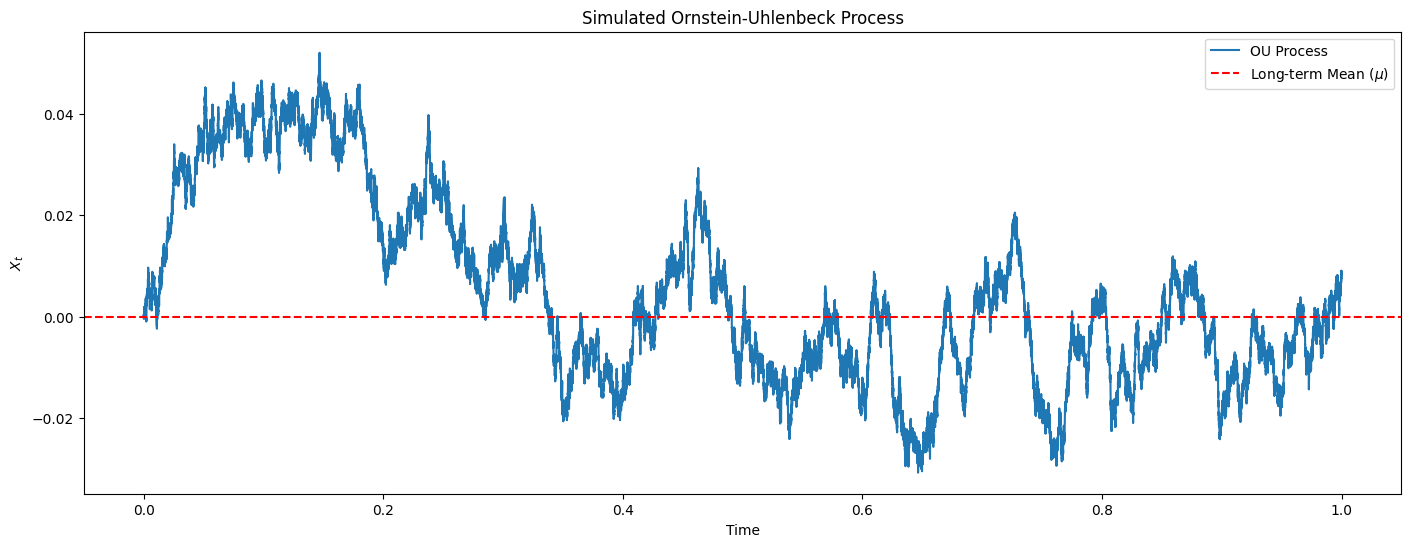

In [4]:

# Parameters
theta = 5
mu = 0.0
sigma = 0.1
T = 1  # time horizon
N = 10**5
np.random.seed(1234)  # for reproducibility


# Simulating the OU process
t, dt = np.linspace(0, T, N, retstep=True)
X = np.zeros_like(t)
X[0] = mu
for i in range(1, len(t)):
    dW = np.sqrt(dt) * np.random.normal()
    X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * dW

# Plotting the simulated OU process
plt.figure(figsize=(17, 6))
plt.plot(t, X, label='OU Process')
plt.axhline(y=mu, color='r', linestyle='--', label='Long-term Mean ($\mu$)')
plt.xlabel('Time')
plt.ylabel('$X_t$')
plt.title('Simulated Ornstein-Uhlenbeck Process')
plt.legend()
plt.show()

### **Real Example with EUR/USD Exchange Rate**

In the realm of Forex trading, the exchange rate between the Euro (EUR) and the United States Dollar (USD) has always been of paramount significance, offering insights into the economic stability and interactions between the Eurozone and the United States. The EUR/USD currency pair is one of the most traded pairs on the Forex market, and its behavior is influenced by various factors, including economic indicators, political events, and changes in global financial markets.


This visualization serves as a foundation for exploring various aspects of financial analysis, such as identifying potential mean-reverting behavior, understanding volatility, and developing trading strategies. It acts as a canvas upon which deeper analyses, such as statistical tests and the formulation of algorithmic trading strategies, can be built.



[*********************100%%**********************]  1 of 1 completed


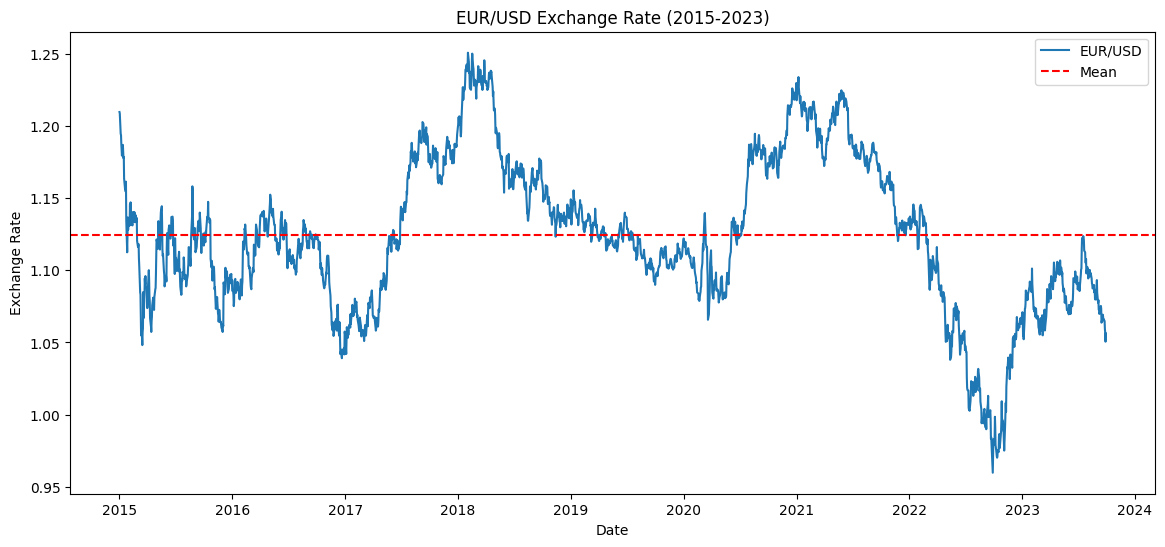

In [5]:


# Fetching USD/EUR data
ticker = "EURUSD=X"
data = yf.download(ticker, start="2015-01-01", end="2023-10-01")

# Plotting the data
plt.figure(figsize=(14, 6))
plt.plot(data['Adj Close'], label='EUR/USD')
plt.axhline(y=data['Close'].mean(), color='r', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('EUR/USD Exchange Rate (2015-2023)')
plt.legend()
plt.show()

# The Hurst Exponent: Measuring Time Series Memory

The Hurst exponent (H) is a valuable tool for understanding the long-term memory of a time series. It provides insights into how a time series deviates from a random walk and helps classify it into one of three categories:

- H < 0.5: Indicates a mean-reverting (anti-persistent) series. The closer H is to 0, the stronger the mean-reversion process. In practical terms, this means that a high value is followed by a low one and vice versa.

- H = 0.5: Represents a geometric random walk, where the series follows a random and unpredictable path.

- H > 0.5: Indicates a trending (persistent) series. The closer H is to 1, the stronger the trend. In this case, a high value tends to be followed by an even higher one.

The Hurst exponent can be calculated in various ways, but we'll focus on a simple approach based on estimating diffusive behavior using the variance of log prices.

Let's define **$x$** as the logarithm of stock prices **$S$**.

The variance for an arbitrary lag (τ) can be expressed as:

$$Var(τ) = E[(x_{t+\tau} - x_{\tau})^2]$$

If stock prices follow a geometric Brownian motion (GBM), the variance would vary linearly with the lag τ:

$$Var(τ) \sim τ$$

However, stock prices often deviate from a GBM, exhibiting autocorrelation or long-range dependence. In such cases, the variance for a given lag is no longer proportional to the lag itself but follows an anomalous exponent:

$$Var(τ) \sim τ^{2H}$$

Here, **H** represents the Hurst exponent.

Another method to calculate the Hurst exponent is through [rescaled range (R/S) analysis](https://www.investopedia.com/terms/r/rescaled-rangeanalysis.asp), which offers superior results compared to some other methods. However, it's sensitive to short-range dependence.

We'll use the first method, focusing on the variance of log prices, as a simple yet effective way to estimate the Hurst exponent. By understanding the Hurst exponent, we can gain valuable insights into the memory and behavior of time series data, which is essential for various applications in finance and beyond.


In [6]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

**Through the utilization of the Hurst exponent, it is evident that ``the Ornstein-Uhlenbeck (OU) process`` and the ``EUR/USD exchange rate ``exhibit mean-reverting behavior.**

In [7]:
# Hurst exponent for EUR/USD rate

for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(data['Adj Close'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4507
Hurst exponent with 100 lags: 0.4607
Hurst exponent with 300 lags: 0.4924
Hurst exponent with 500 lags: 0.4477
Hurst exponent with 1000 lags: 0.2045


In [8]:
# The OU process

for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(X, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4940
Hurst exponent with 100 lags: 0.4922


Hurst exponent with 300 lags: 0.4873
Hurst exponent with 500 lags: 0.4808
Hurst exponent with 1000 lags: 0.4674


In [16]:
# The S&P500 historical prices 

spy_df = yf.download("^GSPC", 
                     start="2010-01-01", 
                     end="2023-10-01", 
                     progress=False)

for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(spy_df['Adj Close'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4778
Hurst exponent with 100 lags: 0.4121
Hurst exponent with 300 lags: 0.4422
Hurst exponent with 500 lags: 0.4111
Hurst exponent with 1000 lags: 0.2758


Another example can be drawn from the Japanese stock market during the period leading up to what is known as the "Japanese asset price bubble."

#### **Period: Japanese Asset Price Bubble (approximately 1983–1991)**


During this time, the Japanese stock market, particularly the Nikkei 225 index, experienced a tremendous surge in prices. The index skyrocketed from around 7,000 points in 1983 to a peak of nearly 39,000 points at the end of 1989. Many stocks in real estate, technology, and finance, among other sectors, experienced pronounced, sustained uptrends.

The prices of Japanese equities during this period were not mean-reverting in the short term, and often they continued to rise despite being detached from underlying economic fundamentals. The belief in perpetual growth and the speculative nature of investments during this time created a bubble that eventually burst in the early 1990s

In [40]:
nikkei225_df = yf.download("^N225", 
                     start="1983-01-01", 
                     end="1991-12-31", 
                     progress=False)

# Calculate and display the Hurst exponent for different lags
for lag in [20, 100, 200, 300, 500]:
    hurst_exp = get_hurst_exponent(nikkei225_df['Adj Close'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.5216
Hurst exponent with 100 lags: 0.5508
Hurst exponent with 200 lags: 0.5372
Hurst exponent with 300 lags: 0.5507
Hurst exponent with 500 lags: 0.5619


### **The ADF Test:**

The null hypothesis ($H_0$) of the ADF test posits that a unit root is present in the time series data, indicating non-stationarity. Contrarily, the alternative hypothesis ($H_a$) suggests that the time series is stationary around a deterministic trend (or is trend-stationary).

- **If $H_0$ is not rejected**: 
  This suggests that the data has a unit root and is non-stationary, implying that it does not exhibit mean-reverting behavior.
  
- **If $H_0$ is rejected**: 
  This suggests that the data does not have a unit root and is stationary, indicating a potential mean-reverting behavior.

**`Note`**: You can view the stationarity notebook for more information.